In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

color = sns.color_palette()


train_file = "train_ver2.csv"
test_file = "test_ver2.csv"

In [2]:
train = pd.read_csv(train_file, usecols=['ncodpers'])
test = pd.read_csv(test_file, usecols=['ncodpers'])
print("Number of rows in train : ", train.shape[0])
print("Number of rows in test : ", test.shape[0])

Number of rows in train :  13647309
Number of rows in test :  929615


In [3]:
train_unique_customers = set(train.ncodpers.unique())
test_unique_customers = set(test.ncodpers.unique())
print("Number of customers in train : ", len(train_unique_customers))
print("Number of customers in test : ", len(test_unique_customers))
print("Number of common customers : ", len(train_unique_customers.intersection(test_unique_customers)))

Number of customers in train :  956645
Number of customers in test :  929615
Number of common customers :  929615


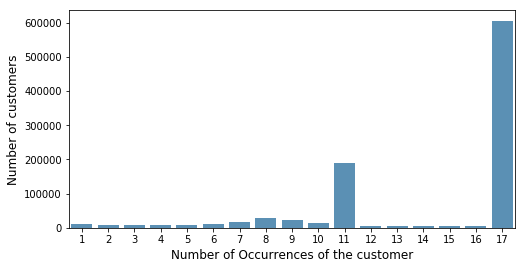

In [4]:
num_occur = train.groupby('ncodpers').agg('size').value_counts()

plt.figure(figsize=(8,4))
sns.barplot(num_occur.index, num_occur.values, alpha=0.8, color=color[0])
plt.xlabel('Number of Occurrences of the customer', fontsize=12)
plt.ylabel('Number of customers', fontsize=12)
plt.show()

In [5]:
del train_unique_customers
del test_unique_customers

In [6]:
train = pd.read_csv("train_ver2.csv", dtype='float16', 
                    usecols=['ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 
                             'ind_cco_fin_ult1', 'ind_cder_fin_ult1',
                             'ind_cno_fin_ult1', 'ind_ctju_fin_ult1',
                             'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1',
                             'ind_ctpp_fin_ult1', 'ind_deco_fin_ult1',
                             'ind_deme_fin_ult1', 'ind_dela_fin_ult1',
                             'ind_ecue_fin_ult1', 'ind_fond_fin_ult1',
                             'ind_hip_fin_ult1', 'ind_plan_fin_ult1',
                             'ind_pres_fin_ult1', 'ind_reca_fin_ult1',
                             'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1',
                             'ind_viv_fin_ult1', 'ind_nomina_ult1',
                             'ind_nom_pens_ult1', 'ind_recibo_ult1'])

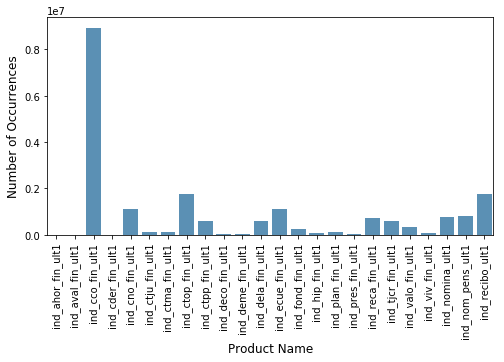

In [7]:
target_counts = train.astype('float64').sum(axis=0)
#print(target_counts)
plt.figure(figsize=(8,4))
sns.barplot(target_counts.index, target_counts.values, alpha=0.8, color=color[0])
plt.xlabel('Product Name', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

In [8]:
train = pd.read_csv("train_ver2.csv", usecols=['fecha_dato', 'fecha_alta'], parse_dates=['fecha_dato', 'fecha_alta'])

In [9]:
train['fecha_dato_yearmonth'] = train['fecha_dato'].apply(lambda x: (100*x.year) + x.month)

In [10]:
yearmonth = train['fecha_dato_yearmonth'].value_counts()

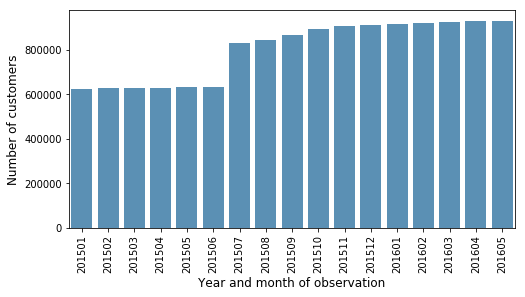

In [11]:
plt.figure(figsize=(8,4))
sns.barplot(yearmonth.index, yearmonth.values, alpha=0.8, color=color[0])
plt.xlabel('Year and month of observation', fontsize=12)
plt.ylabel('Number of customers', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

Minimum value of fecha_alta :  199501.0
Maximum value of fecha_alta :  201605.0


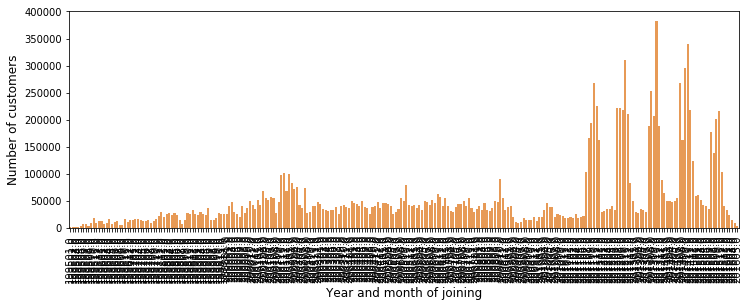

In [12]:
train['fecha_alta_yearmonth'] = train['fecha_alta'].apply(lambda x: (100*x.year) + x.month)
yearmonth = train['fecha_alta_yearmonth'].value_counts()
print("Minimum value of fecha_alta : ", min(yearmonth.index))
print("Maximum value of fecha_alta : ", max(yearmonth.index))

plt.figure(figsize=(12,4))
sns.barplot(yearmonth.index, yearmonth.values, alpha=0.8, color=color[1])
plt.xlabel('Year and month of joining', fontsize=12)
plt.ylabel('Number of customers', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

In [13]:
year_month = yearmonth.sort_index().reset_index()
year_month = year_month.loc[185:,:]
year_month.columns = ['yearmonth', 'number_of_customers']

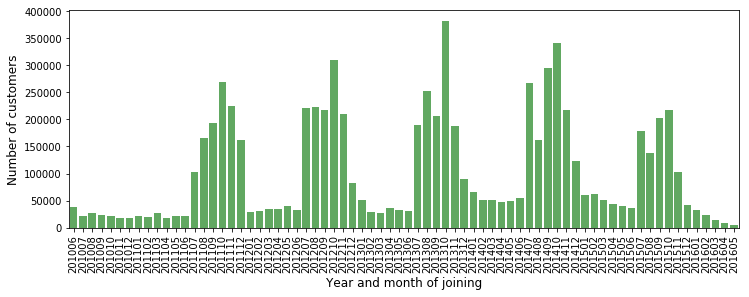

In [14]:
plt.figure(figsize=(12,4))
sns.barplot(year_month.yearmonth.astype('int'), year_month.number_of_customers, alpha=0.8, color=color[2])
plt.xlabel('Year and month of joining', fontsize=12)
plt.ylabel('Number of customers', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

In [15]:
train = pd.read_csv(train_file, usecols=['age'])
train.head()

C:\Users\ivo\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,age
0,35
1,23
2,23
3,22
4,23


In [16]:
print(list(train.age.unique()))

[' 35', ' 23', ' 22', ' 24', ' 65', ' 28', ' 25', ' 26', ' 53', ' 27', ' 32', ' 37', ' 31', ' 39', ' 63', ' 33', ' 55', ' 42', ' 58', ' 38', ' 50', ' 30', ' 45', ' 44', ' 36', ' 29', ' 60', ' 57', ' 67', ' 47', ' NA', ' 34', ' 48', ' 46', ' 54', ' 84', ' 15', ' 12', '  8', '  6', ' 83', ' 40', ' 77', ' 69', ' 52', ' 59', ' 43', ' 10', '  9', ' 49', ' 41', ' 51', ' 78', ' 16', ' 11', ' 73', ' 62', ' 66', ' 17', ' 68', ' 82', ' 95', ' 96', ' 56', ' 61', ' 79', ' 72', ' 14', ' 19', ' 13', ' 86', ' 64', ' 20', ' 89', ' 71', '  7', ' 70', ' 74', ' 21', ' 18', ' 75', '  4', ' 80', ' 81', '  5', ' 76', ' 92', ' 93', ' 85', ' 91', ' 87', ' 90', ' 94', ' 99', ' 98', ' 88', ' 97', '100', '101', '106', '103', '  3', '  2', '102', '104', '111', '107', '109', '105', '112', '115', '110', '116', '108', '113', 37, 81, 43, 30, 45, 41, 67, 59, 46, 36, 47, 69, 39, 44, 40, 38, 34, 42, 31, 35, 48, 60, 54, 51, 33, 62, 50, 11, 57, 55, 85, 80, 70, 32, 52, 94, 61, 13, 29, 49, 76, 28, 63, 10, 88, 68, 64, 58, 56

In [17]:
train['age'] = train['age'].replace(to_replace=[' NA'], value=np.nan)

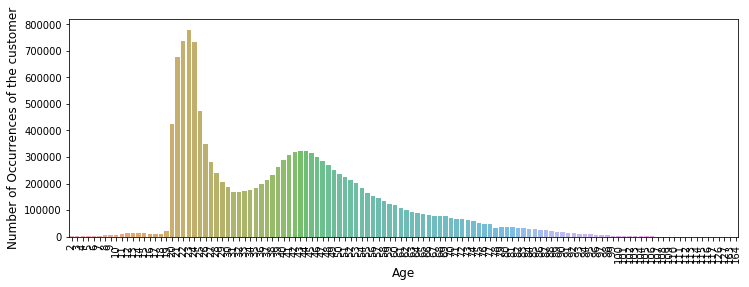

In [18]:
train['age'] = train['age'].astype('float64')

age_series = train.age.value_counts()
plt.figure(figsize=(12,4))
sns.barplot(age_series.index.astype('int'), age_series.values, alpha=0.8)
plt.ylabel('Number of Occurrences of the customer', fontsize=12)
plt.xlabel('Age', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

In [19]:
train.age.isnull().sum()

27734

In [20]:
train.age.mean()

40.18146491355274

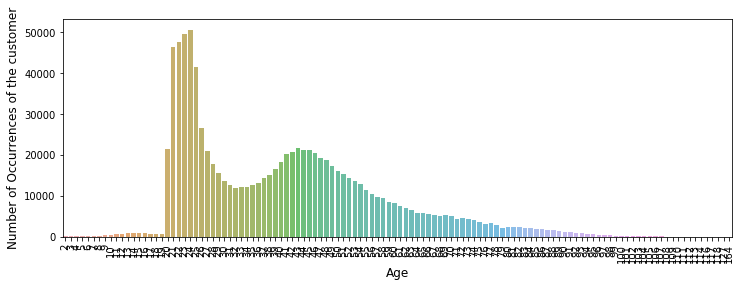

In [21]:
test = pd.read_csv(test_file, usecols=['age'])
test['age'] = test['age'].replace(to_replace=[' NA'], value=np.nan)
test['age'] = test['age'].astype('float64')

age_series = test.age.value_counts()
plt.figure(figsize=(12,4))
sns.barplot(age_series.index.astype('int'), age_series.values, alpha=0.8)
plt.ylabel('Number of Occurrences of the customer', fontsize=12)
plt.xlabel('Age', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

In [22]:
train = pd.read_csv(train_file, usecols=['antiguedad'])
train.head()

C:\Users\ivo\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,antiguedad
0,6
1,35
2,35
3,35
4,35


In [23]:
print(list(train.antiguedad.unique()))

['      6', '     35', '     34', '     NA', '     33', '     31', '     21', '     16', '     27', '      9', '     22', '     13', '     29', '      8', '     11', '     10', '     28', '     24', '      7', '     25', '     14', '     26', '     12', '     23', '      1', '     18', '      4', '      3', '     17', '     32', '     30', '     20', '     15', '     19', '    157', '     36', '      5', '     40', '     38', '     37', '     39', '      0', '      2', '     47', '     44', '     42', '     46', '     45', '     43', '     41', '     57', '     48', '     52', '     49', '     50', '     56', '     58', '     51', '     55', '     54', '     53', '     59', '     62', '     61', '     60', '     63', '    139', '    165', '    118', '    164', '    142', '     94', '    159', '    143', '    105', '    151', '    162', '    137', '    150', '    128', '    122', '    156', '    119', '    160', '     79', '     95', '    132', '    161', '     98', '    127', '     72'

In [24]:
train['antiguedad'] = train['antiguedad'].replace(to_replace=['     NA'], value=np.nan)
train.antiguedad.isnull().sum()

27734

In [25]:
train['antiguedad'] = train['antiguedad'].astype('float64')
(train['antiguedad'] == -999999.0).sum()

38

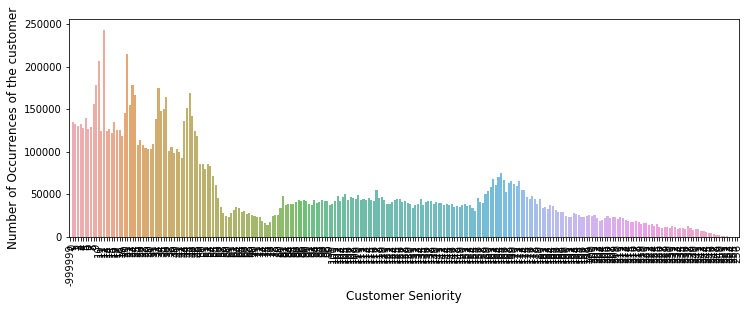

In [26]:
col_series = train.antiguedad.value_counts()
plt.figure(figsize=(12,4))
sns.barplot(col_series.index.astype('int'), col_series.values, alpha=0.8)
plt.ylabel('Number of Occurrences of the customer', fontsize=12)
plt.xlabel('Customer Seniority', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

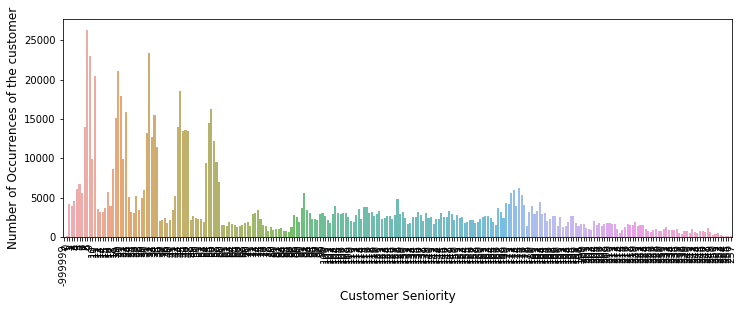

In [27]:
test = pd.read_csv(test_file, usecols=['antiguedad'])
test['antiguedad'] = test['antiguedad'].replace(to_replace=[' NA'], value=np.nan)
test['antiguedad'] = test['antiguedad'].astype('float64')

col_series = test.antiguedad.value_counts()
plt.figure(figsize=(12,4))
sns.barplot(col_series.index.astype('int'), col_series.values, alpha=0.8)
plt.ylabel('Number of Occurrences of the customer', fontsize=12)
plt.xlabel('Customer Seniority', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

In [28]:
train = pd.read_csv(train_file, usecols=['renta'])
train.head()

,renta
0,87218.10
1,35548.74
2,122179.11
3,119775.54
4,NaN


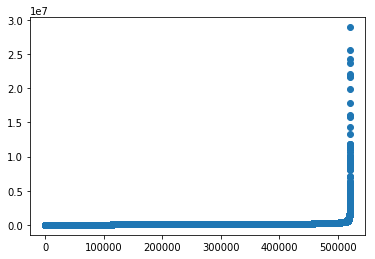

In [35]:
unique_values = np.sort(train.renta.unique())
plt.scatter(range(len(unique_values)), unique_values)
plt.show()

In [36]:
train.renta.mean()

134254.3182380867

In [37]:
train.renta.median()

101850.0

In [38]:
train.renta.isnull().sum()

2794375

In [39]:
train.fillna(101850., inplace=True) #filling NA as median for now

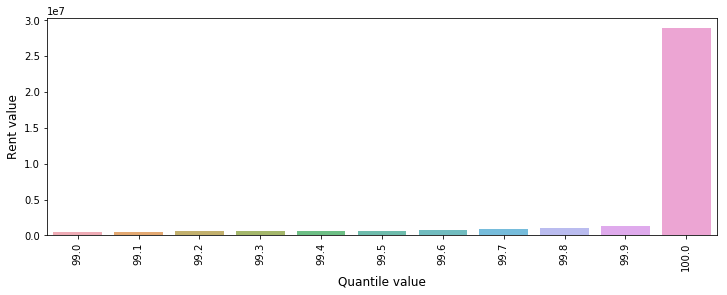

0.990    5.045464e+05
0.991    5.272241e+05
0.992    5.529477e+05
0.993    5.834897e+05
0.994    6.248048e+05
0.995    6.739559e+05
0.996    7.440539e+05
0.997    8.352538e+05
0.998    9.917730e+05
0.999    1.354778e+06
1.000    2.889440e+07
Name: renta, dtype: float64

In [44]:
quantile_series = train.renta.quantile(np.arange(0.99,1,0.001))
plt.figure(figsize=(12,4))
sns.barplot((quantile_series.index*100), quantile_series.values, alpha=0.8)
plt.ylabel('Rent value', fontsize=12)
plt.xlabel('Quantile value', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()
quantile_series

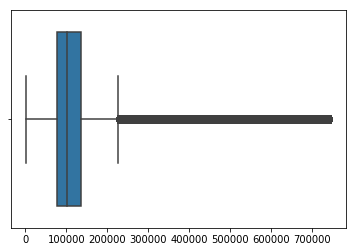

In [49]:
rent_max_cap = train.renta.quantile(0.999)
train['renta'][train['renta']>rent_max_cap] = 101850.0 # assigining median value 
sns.boxplot(train.renta.values)
plt.show()

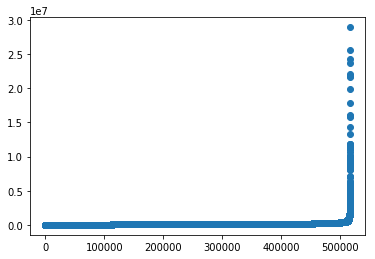

In [50]:
test = pd.read_csv(test_file, usecols=['renta'])
test['renta'] = test['renta'].replace(to_replace=['         NA'], value=np.nan).astype('float')
unique_values = np.sort(test.renta.unique())
plt.scatter(range(len(unique_values)), unique_values)
plt.show()

In [51]:
test.renta.mean()

134087.87059462993

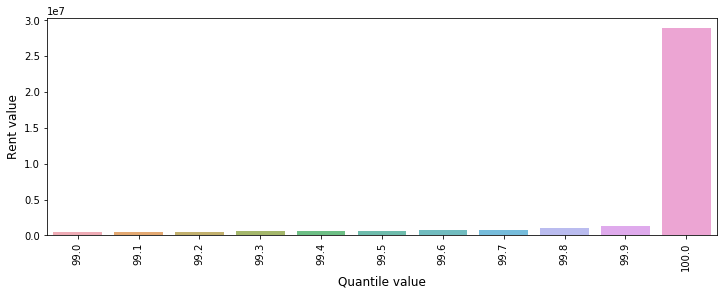

In [52]:
test.fillna(101850., inplace=True) #filling NA as median for now
quantile_series = test.renta.quantile(np.arange(0.99,1,0.001))
plt.figure(figsize=(12,4))
sns.barplot((quantile_series.index*100), quantile_series.values, alpha=0.8)
plt.ylabel('Rent value', fontsize=12)
plt.xlabel('Quantile value', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

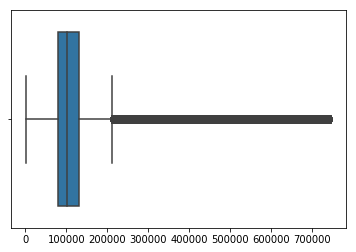

In [53]:
test['renta'][test['renta']>rent_max_cap] = 101850.0 # assigining median value 
sns.boxplot(test.renta.values)
plt.show()

In [72]:
train = pd.read_csv("train_ver2.csv", nrows=100000)
target_cols = ['ind_cco_fin_ult1', 'ind_cder_fin_ult1',
                             'ind_cno_fin_ult1', 'ind_ctju_fin_ult1',
                             'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1',
                             'ind_ctpp_fin_ult1', 'ind_deco_fin_ult1',
                             'ind_deme_fin_ult1', 'ind_dela_fin_ult1',
                             'ind_ecue_fin_ult1', 'ind_fond_fin_ult1',
                             'ind_hip_fin_ult1', 'ind_plan_fin_ult1',
                             'ind_pres_fin_ult1', 'ind_reca_fin_ult1',
                             'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1',
                             'ind_viv_fin_ult1', 'ind_nomina_ult1',
                             'ind_nom_pens_ult1', 'ind_recibo_ult1']
train[target_cols] = (train[target_cols].fillna(0))
train["age"] = train['age'].map(str.strip).replace(['NA'], value=0).astype('float')
train["antiguedad"] = train["antiguedad"].map(str.strip).replace(['NA'], value=0).astype('float')
train["antiguedad"].ix[train["antiguedad"]>65] = 65 # there is one very high skewing the graph
train["renta"].ix[train["renta"]>1e6] = 1e6 # capping the higher values for better visualisation
train.fillna(-1, inplace=True)

C:\Users\ivo\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  app.launch_new_instance()
C:\Users\ivo\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\ivo\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


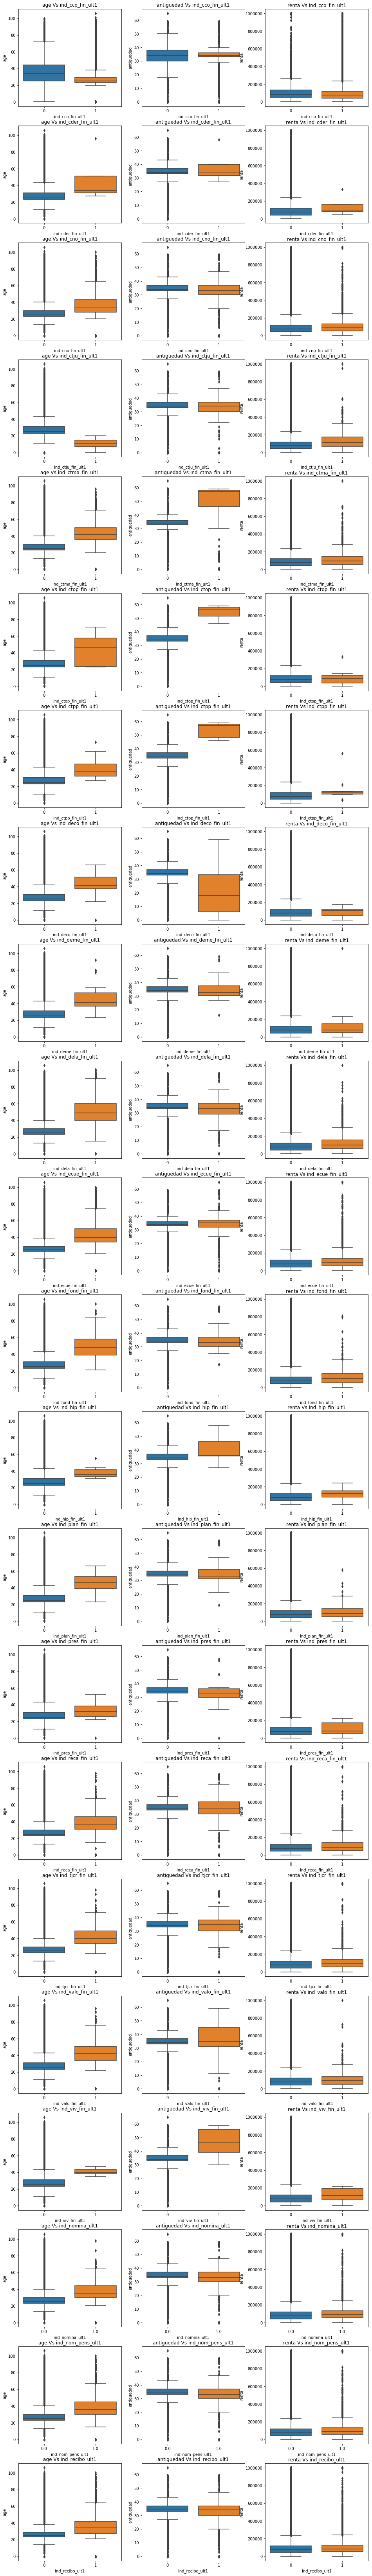

In [73]:
fig = plt.figure(figsize=(16, 120))
numeric_cols = ['age', 'antiguedad', 'renta']
#for ind1, numeric_col in enumerate(numeric_cols):
plot_count = 0
for ind, target_col in enumerate(target_cols):
    for numeric_col in numeric_cols:
        plot_count += 1
        plt.subplot(22, 3, plot_count)
        sns.boxplot(x=target_col, y=numeric_col, data=train)
        plt.title(numeric_col+" Vs "+target_col)
plt.show()

Number of unique values in  ind_empleado  :  6


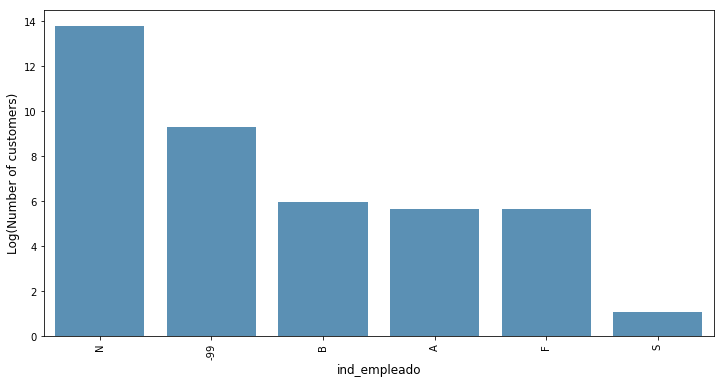


Number of unique values in  pais_residencia  :  114


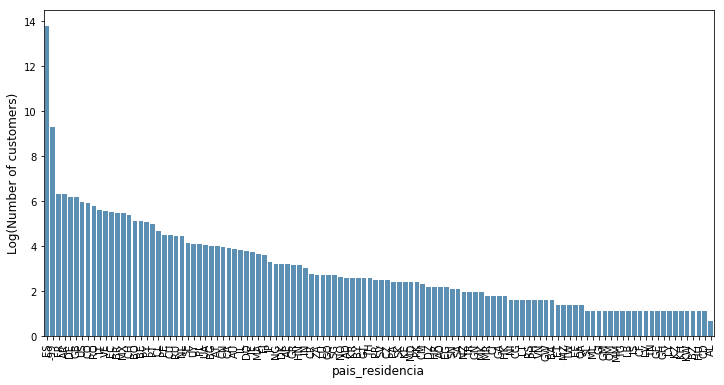


Number of unique values in  sexo  :  3


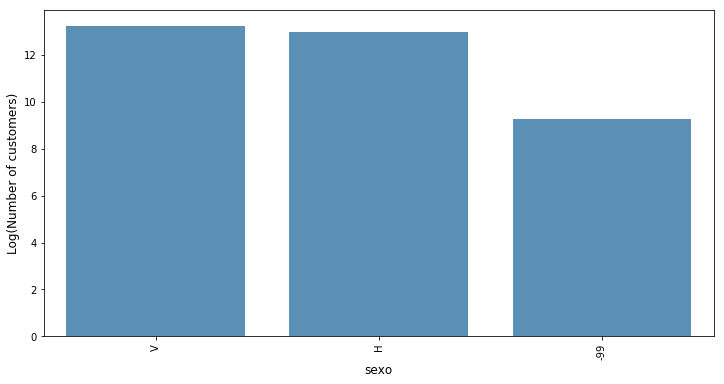


Number of unique values in  ind_nuevo  :  3


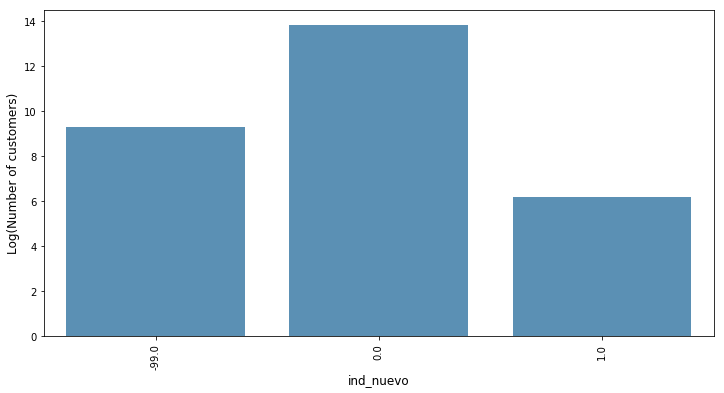


Number of unique values in  indrel  :  3


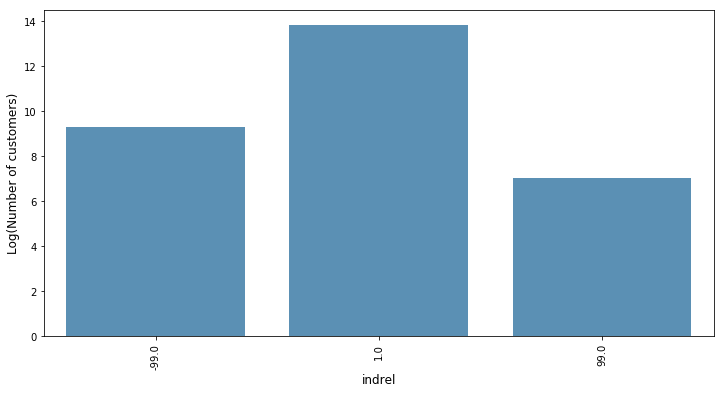


Number of unique values in  ult_fec_cli_1t  :  23


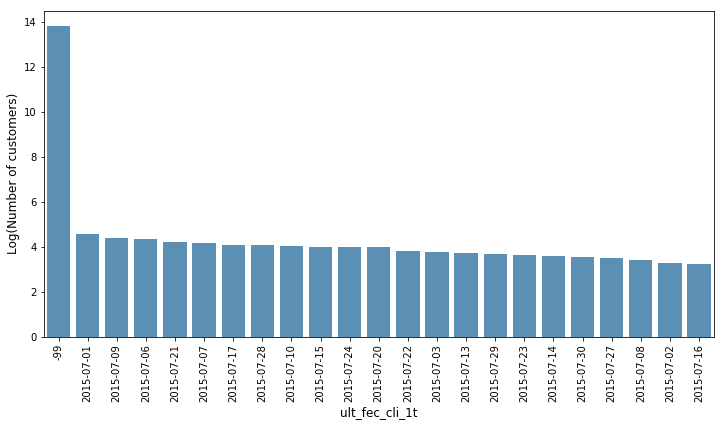


Number of unique values in  indrel_1mes  :  4


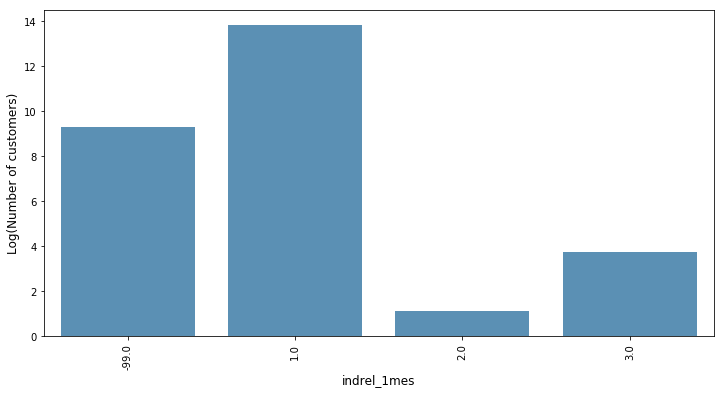


Number of unique values in  tiprel_1mes  :  4


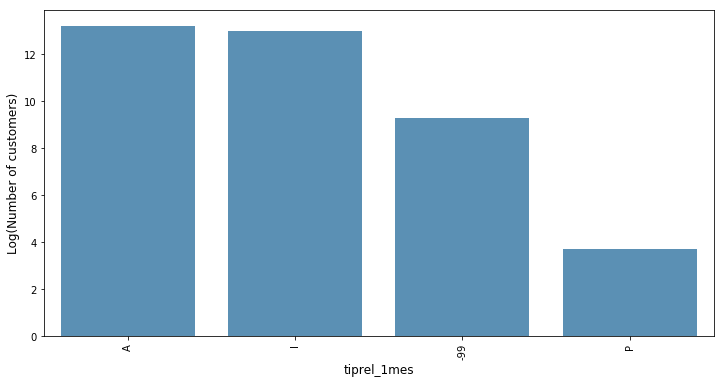


Number of unique values in  indresi  :  3


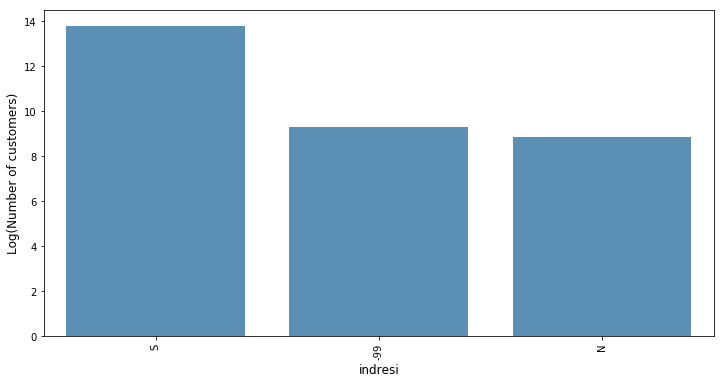


Number of unique values in  indext  :  3


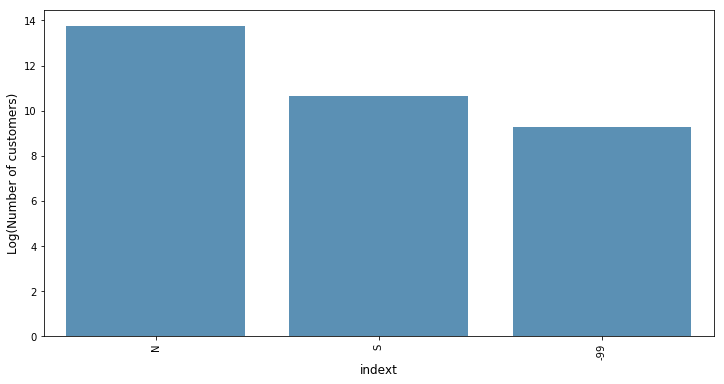

C:\Users\ivo\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Number of unique values in  conyuemp  :  3


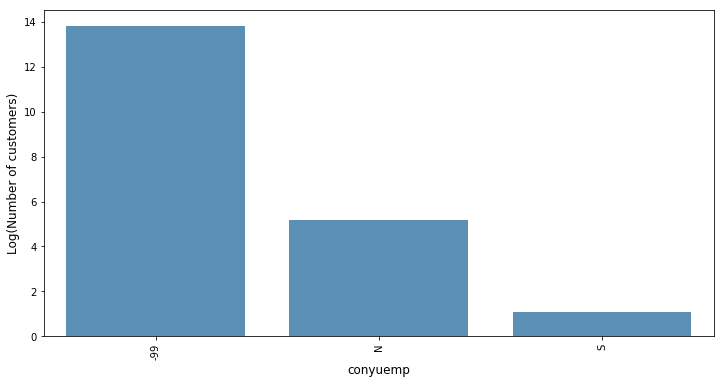


Number of unique values in  canal_entrada  :  157


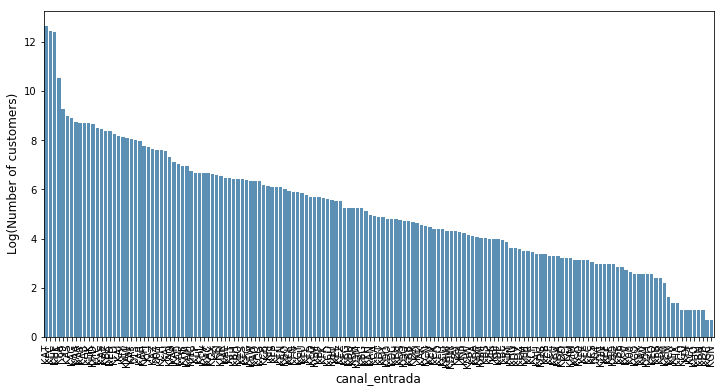


Number of unique values in  indfall  :  3


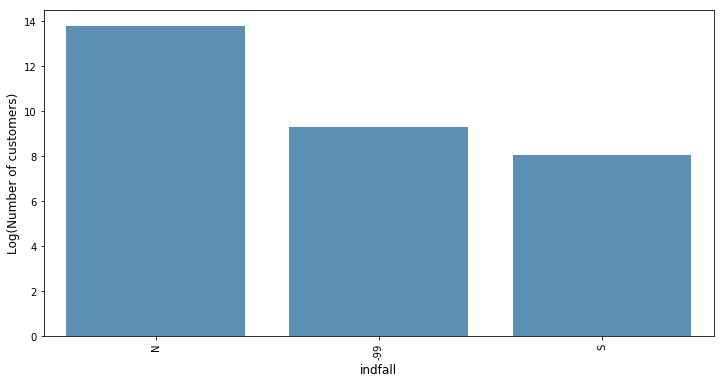


Number of unique values in  tipodom  :  2


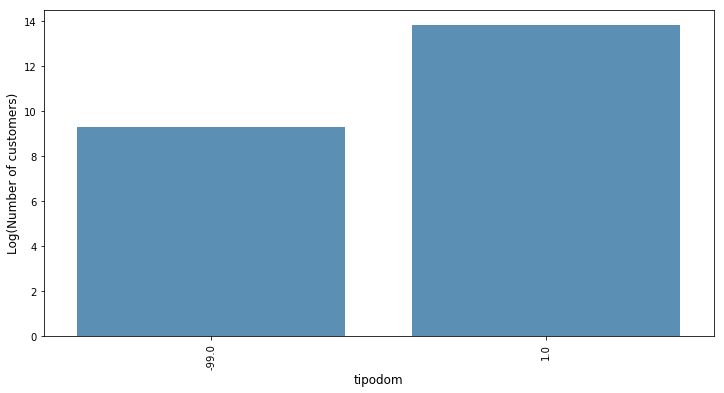


Number of unique values in  cod_prov  :  53


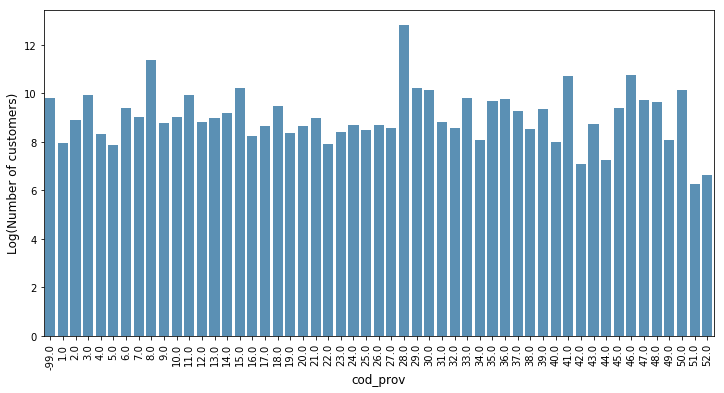


Number of unique values in  nomprov  :  53


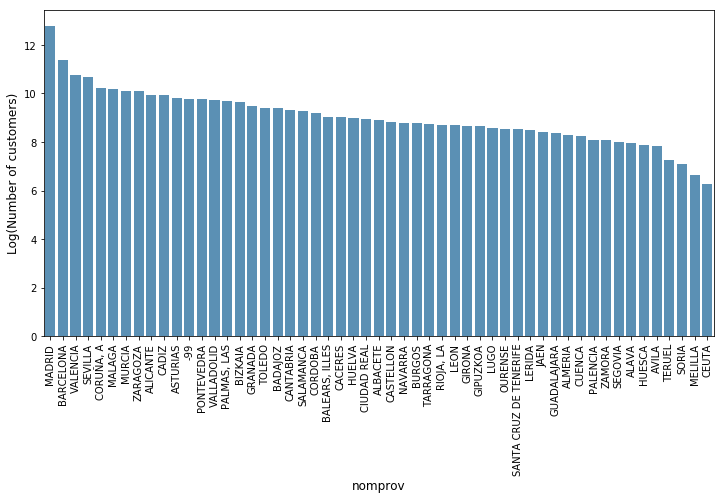


Number of unique values in  ind_actividad_cliente  :  3


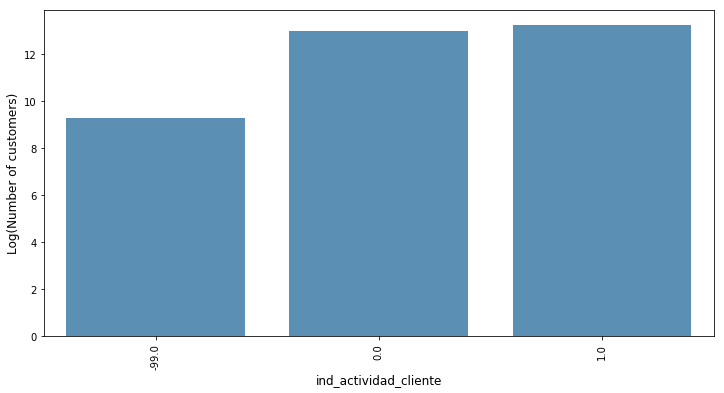


Number of unique values in  segmento  :  4


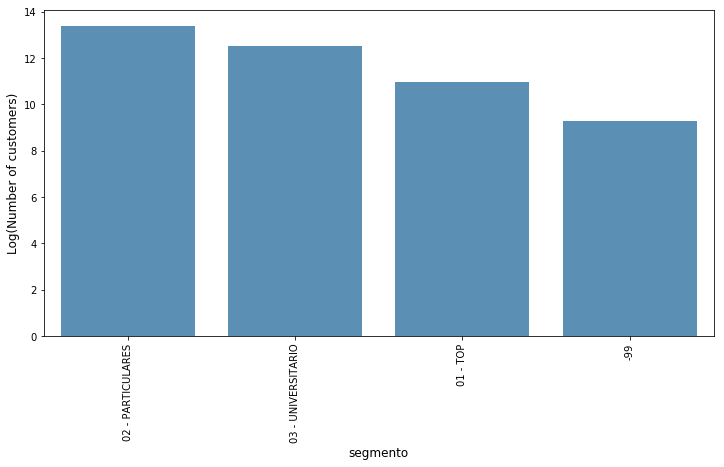

In [75]:
cols = ["ind_empleado","pais_residencia","sexo","ind_nuevo","indrel","ult_fec_cli_1t","indrel_1mes","tiprel_1mes","indresi","indext","conyuemp","canal_entrada","indfall","tipodom","cod_prov","nomprov","ind_actividad_cliente","segmento"]
for col in cols:
    train = pd.read_csv("train_ver2.csv", usecols = ["ncodpers", col], nrows=1000000)
    train = train.fillna(-99)
    len_unique = len(train[col].unique())
    print("Number of unique values in ",col," : ",len_unique)
    if len_unique < 200:
        agg_df = train[col].value_counts()
        plt.figure(figsize=(12,6))
        sns.barplot(agg_df.index, np.log1p(agg_df.values), alpha=0.8, color=color[0])
        plt.xlabel(col, fontsize=12)
        plt.ylabel('Log(Number of customers)', fontsize=12)
        plt.xticks(rotation='vertical')
        plt.show()
    print()